In [ ]:
import google.colab
google.colab.auth.authenticate_user()

#authentication and establish connection
from google.colab import drive
drive.mount('/content/drive')

!ls '/content/drive/My Drive'

Mounted at /content/drive
 BasedOnMaterial   ClassData	      Denomination   models
 BasedOnPeriod	  'Colab Notebooks'   Edited.csv


# One time run

In [ ]:
#import dependencies and read files
import csv
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/RDataset.csv')
print(df)

In [ ]:
#delete when following are empty and uncertain
df= df.dropna(subset= ['rulerName', 'mintName', 'denominationName'])
df= df[~df['rulerName'].str.contains('uncertain', case= False)]
#filter rows with coin object type
df= df[df['objecttype']== 'COIN']
print(df)

In [ ]:
#save csv file
df.to_csv('/content/drive/MyDrive/Edited.csv', index= False)

# Continue execution

In [ ]:
import csv
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Edited.csv')
df.tail(10)

,id,objecttype,thickness (mm),diameter (mm),weight (g),quantity,broadperiod,material,rulerName,mintName,denominationName,reeceID,regionName,country,district
13758,1011920,COIN,0.50,14.90,0.30,1,MEDIEVAL,Copper alloy,Henry III of England,London,Cut halfpenny,NaN,South East,Hampshire,Havant
13759,864072,COIN,NaN,17.67,1.28,1,MEDIEVAL,Copper alloy,Henry III of England,London,Penny,NaN,South East,Hampshire,Basingstoke and Deane
13760,847274,COIN,1.50,17.80,1.30,1,MEDIEVAL,Copper alloy,Henry III of England,Unknown,Penny,NaN,South East,Hampshire,Basingstoke and Deane
13761,237088,COIN,NaN,4.92,1.06,1,MEDIEVAL,Copper alloy,Edward I of England,Durham,Penny,NaN,South East,Hampshire,Winchester
13762,1101229,COIN,0.45,10.85,0.26,1,MEDIEVAL,Base silver,Edward I of England,Bristol,Farthing,NaN,South East,Hampshire,Winchester
13763,845408,COIN,NaN,14.30,0.46,1,MEDIEVAL,Base silver,Edward IV of England (first reign),London,Halfpenny,NaN,South East,Hampshire,Test Valley
13764,811696,COIN,NaN,17.00,1.06,1,MEDIEVAL,Base silver,Edward I of England,Canterbury,Penny,NaN,South East,Hampshire,Test Valley
13765,753524,COIN,NaN,12.90,0.20,1,MEDIEVAL,Base silver,Edward I of England,London,Farthing,NaN,South East,Hampshire,Test Valley
13766,594033,COIN,NaN,17.00,1.02,1,MEDIEVAL,Base silver,Edward III of England,York,Penny,NaN,South East,Hampshire,Test Valley
13767,472905,COIN,0.75,NaN,0.36,1,MEDIEVAL,Base silver,Edward I of England,London,Farthing,NaN,South East,Hampshire,Winchester


In [ ]:
#filter rows w coin object type
df= df[df['objecttype']== 'COIN']

In [ ]:
count_roman= df[df['broadperiod']== 'ROMAN'].shape[0]
count_medieval= df[df['broadperiod']== 'MEDIEVAL'].shape[0]
print('Roman dataset count: '+ str(count_roman)+ '\nMedieval: '+ str(count_medieval))

Roman dataset count: 7727
Medieval: 6041


In [ ]:
#dataset with reeceid for roman period
df1= df.dropna(subset= ['reeceID'])
df1[df1['broadperiod'] == 'ROMAN'].shape[0]

7242

In [ ]:
df.dtypes

id                    int64
objecttype           object
thickness (mm)      float64
diameter (mm)       float64
weight (g)          float64
quantity              int64
broadperiod          object
material             object
rulerName            object
mintName             object
denominationName     object
reeceID             float64
regionName           object
country              object
district             object
dtype: object

In [ ]:
df.groupby(['material', 'broadperiod']).size().sort_values(ascending= False)

material      broadperiod
Copper alloy  ROMAN          6204
Silver        MEDIEVAL       5980
              ROMAN          1417
Base silver   ROMAN           103
Gold          MEDIEVAL         34
Base silver   MEDIEVAL         14
Copper alloy  MEDIEVAL         13
Copper        ROMAN             3
dtype: int64

In [ ]:
df.groupby(['denominationName', 'broadperiod']).size().sort_values(ascending= False)

denominationName                    broadperiod
Nummus (AE 1 - AE 4)                ROMAN          3992
Penny                               MEDIEVAL       3459
Radiate (antoninianus)              ROMAN          1201
Denarius (Empire)                   ROMAN          1022
Cut halfpenny                       MEDIEVAL        845
Halfpenny                           MEDIEVAL        538
Sestertius                          ROMAN           525
Farthing                            MEDIEVAL        338
Siliqua                             ROMAN           274
As                                  ROMAN           259
Half groat                          MEDIEVAL        256
Cut farthing                        MEDIEVAL        219
Groat                               MEDIEVAL        212
Denarius (Roman Republic)           ROMAN           139
Dupondius                           ROMAN           106
Q radiate                           ROMAN            91
Soldino                             MEDIEVAL         77


**Feature engineering**

In [ ]:
rulerName= pd.get_dummies(df['rulerName'])
mintName= pd.get_dummies(df['mintName'])

In [ ]:
material= pd.get_dummies(df['material'])
material.head(2)

,Base silver,Copper,Copper alloy,Gold,Silver
0,False,False,True,False,False
1,False,False,True,False,False


In [ ]:
denominationName= pd.get_dummies(df['denominationName'])
denominationName.head(2)

,Angel,Argenteus,As,As (Roman Republic),Cut farthing,Cut halfpenny,Denarius (Empire),Denarius (Roman Republic),Denarius serratus (Roman Republic),Double patard,...,Ryal,Semis,Sestertius,Siliqua,Siliqua (reduced weight),Soldino,Solidus,Sterling,Three farthings,Uncertain
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
new_data= pd.concat([material, rulerName, mintName, denominationName], axis= 1)

**Create separate target variables**

In [ ]:
y= df.broadperiod
y= y.map({'ROMAN': 0, 'MEDIEVAL': 1})

In [ ]:
new_data.head(10)

,Base silver,Copper,Copper alloy,Gold,Silver,A. Venier (1382-1400) - T. Mocenigo (1414-1423) doges of Venice,Aelius Caesar,Aemilian,Agostino Barbarigo,Alexander II of Scotland,...,Ryal,Semis,Sestertius,Siliqua,Siliqua (reduced weight),Soldino,Solidus,Sterling,Three farthings,Uncertain
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x= new_data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0, stratify= y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9637, 356) (4131, 356) (9637,) (4131,)


In [ ]:
classifier = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
#save model trained on 4 features
from joblib import dump
dump(classifier, '/content/drive/MyDrive/models/randomForest4.joblib')

['/content/drive/MyDrive/models/randomForest4.joblib']

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2315,    3],
       [   0, 1813]])

In [ ]:
accuracy_score(y_test, y_pred)

0.9992737835875091

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1813

    accuracy                           1.00      4131
   macro avg       1.00      1.00      1.00      4131
weighted avg       1.00      1.00      1.00      4131



In [ ]:
feature_scores= pd.Series(classifier.feature_importances_, index= x_train.columns).sort_values(ascending= False)
feature_scores

Silver                                    0.236268
Penny                                     0.174513
Rome                                      0.060688
London                                    0.059377
Edward I of England                       0.055112
                                            ...   
Ambianum                                  0.000000
Edward IV of England                      0.000000
Arles or Lyons (Valentinianic, 364-75)    0.000000
Arnhem                                    0.000000
Douai                                     0.000000
Length: 356, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
top_features= list(feature_scores.keys())[:25]
top_scores= [feature_scores[feature] for feature in top_features]

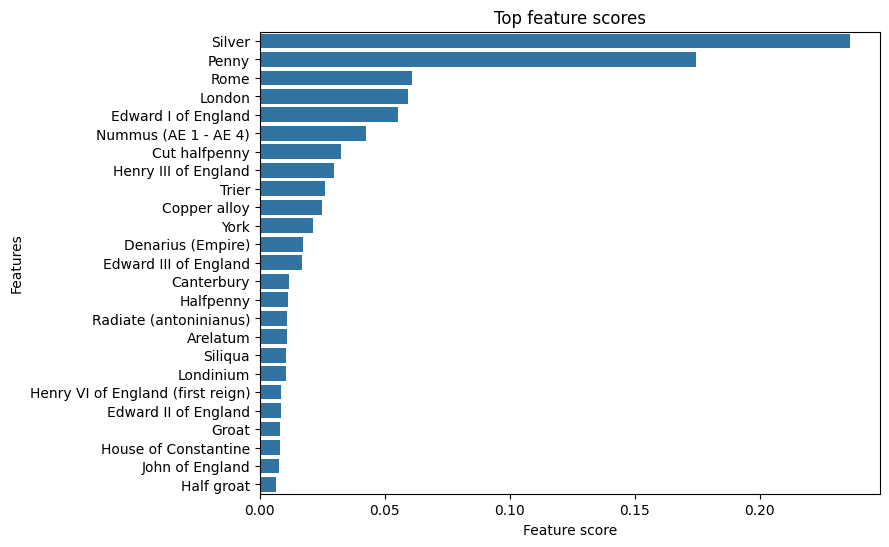

In [ ]:
plt.figure(figsize=(8, 6))
ax= sns.barplot(x= top_scores, y= top_features)
ax.set_title("Top feature scores")
ax.set_xlabel("Feature score")
ax.set_ylabel("Features")
plt.show()

# One time run 2

Following cell runs one time to save the file with headers

In [ ]:
field_names= list(material.columns) + list(rulerName.columns) + list(mintName.columns) + list(denominationName.columns)

#create an empty data frame with the field names
input_df= pd.DataFrame(columns= field_names)
input_df

,Base silver,Copper,Copper alloy,Gold,Silver,A. Venier (1382-1400) - T. Mocenigo (1414-1423) doges of Venice,Aelius Caesar,Aemilian,Agostino Barbarigo,Alexander II of Scotland,...,Ryal,Semis,Sestertius,Siliqua,Siliqua (reduced weight),Soldino,Solidus,Sterling,Three farthings,Uncertain


In [ ]:
input_df.to_pickle('/content/drive/MyDrive/models/input_data.pkl')

# Test user input

In [ ]:
#now you can just load it
input_df= pd.read_pickle('/content/drive/MyDrive/models/input_data.pkl')

In [ ]:
#create a copy of the input_df file to not save changes
temp_df= input_df.copy(deep= True)
temp_df

,Base silver,Copper,Copper alloy,Gold,Silver,A. Venier (1382-1400) - T. Mocenigo (1414-1423) doges of Venice,Aelius Caesar,Aemilian,Agostino Barbarigo,Alexander II of Scotland,...,Ryal,Semis,Sestertius,Siliqua,Siliqua (reduced weight),Soldino,Solidus,Sterling,Three farthings,Uncertain


In [ ]:
user_input_1= ['Copper alloy', 'Gratian', 'Arelatum', 'Nummus (AE 1 - AE 4)']
user_input_2= ['Silver', 'Edward III of England', 'London', 'Penny']

#set input values as 1
temp_df.loc[0, user_input_1]= 1
temp_df.loc[1, user_input_2]= 1

#fill rest records as 0
temp_df= temp_df.fillna(0)
temp_df

,Base silver,Copper,Copper alloy,Gold,Silver,A. Venier (1382-1400) - T. Mocenigo (1414-1423) doges of Venice,Aelius Caesar,Aemilian,Agostino Barbarigo,Alexander II of Scotland,...,Ryal,Semis,Sestertius,Siliqua,Siliqua (reduced weight),Soldino,Solidus,Sterling,Three farthings,Uncertain
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#user input prediction, 0- roman, 1- medieval
classifier.predict(temp_df)

array([0, 1])

In [ ]:
material_input= input("Enter material: ")
ruler_input= input("Enter ruler name: ")
mint_input= input("Enter mint name: ")
denom_input= input("Enter denomination name: ")

user_input= [material_input, ruler_input, mint_input, denom_input]

temp_df.loc[0, user_input]= 1
temp_df= temp_df.fillna(0)
temp_df

Enter material: Copper alloy
Enter ruler name: Gratian
Enter mint name: Arelatum
Enter denomination name: Nummus (AE 1 - AE 4)


,Base silver,Copper,Copper alloy,Gold,Silver,A. Venier (1382-1400) - T. Mocenigo (1414-1423) doges of Venice,Aelius Caesar,Aemilian,Agostino Barbarigo,Alexander II of Scotland,...,Ryal,Semis,Sestertius,Siliqua,Siliqua (reduced weight),Soldino,Solidus,Sterling,Three farthings,Uncertain
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#0- roman, 1- medieval
classifier.predict(temp_df)

array([0])

# With only material and denomination

In [ ]:
data2= pd.concat([material, denominationName], axis= 1)
x= data2

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 0, stratify= y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9637, 49) (4131, 49) (9637,) (4131,)


In [ ]:
classifier = RandomForestClassifier(n_estimators= 10, criterion= 'entropy', random_state= 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
#save model trained on 2 features
from joblib import dump
dump(classifier, '/content/drive/MyDrive/models/rForest2.joblib')

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2313,    5],
       [   1, 1812]])

In [ ]:
accuracy_score(y_test, y_pred)

0.9985475671750181

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1813

    accuracy                           1.00      4131
   macro avg       1.00      1.00      1.00      4131
weighted avg       1.00      1.00      1.00      4131



In [ ]:
feature_scores= pd.Series(classifier.feature_importances_, index= x_train.columns).sort_values(ascending= False)
feature_scores

Silver                                2.432505e-01
Penny                                 2.251090e-01
Copper alloy                          1.459450e-01
Denarius (Empire)                     7.895593e-02
Cut halfpenny                         5.185647e-02
Halfpenny                             4.421735e-02
Nummus (AE 1 - AE 4)                  3.797927e-02
Farthing                              2.728516e-02
Siliqua                               2.662298e-02
Groat                                 1.859821e-02
Cut farthing                          1.740123e-02
Half groat                            1.640007e-02
Radiate (antoninianus)                1.538104e-02
Denarius (Roman Republic)             1.392603e-02
Soldino                               7.356486e-03
Gold                                  7.232102e-03
Denarius serratus (Roman Republic)    6.270626e-03
Sestertius                            3.654855e-03
Penny, halfpenny or farthing          2.731923e-03
Halfpenny or farthing          

In [ ]:
top_features= list(feature_scores.keys())[:18]
top_scores= [feature_scores[feature] for feature in top_features]

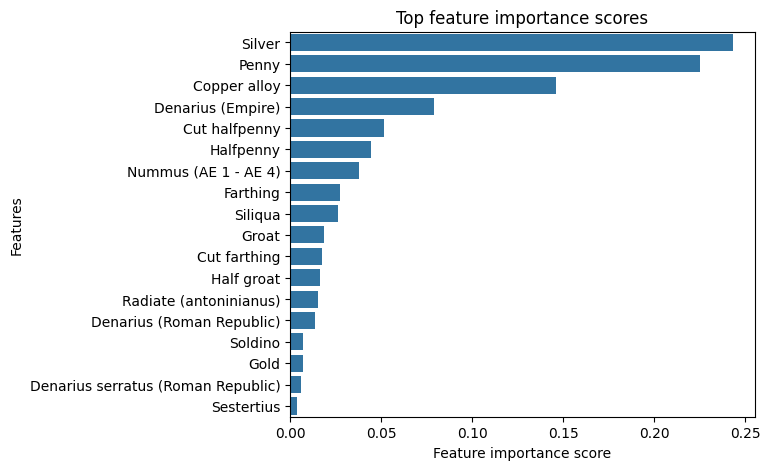

In [ ]:
plt.figure(figsize=(6, 5))
ax= sns.barplot(x= top_scores, y= top_features)
ax.set_title("Top feature importance scores")
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()